# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import seaborn as sns



In [29]:
  
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv') 
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [30]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S


In [32]:
df_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Borramos las columnas que no vamos a precisar

In [34]:
df_transform=df_raw.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

In [35]:
# dos variables nuevas
df_transform['Sex_encoded']=df_transform['Sex'].apply(lambda x: 1 if x=="female" else 0)

In [36]:
df_transform['Embarked_S']=df_transform['Embarked'].apply(lambda x: 1 if x=="S" else 0)

In [37]:
df_transform['Embarked_C']=df_transform['Embarked'].apply(lambda x: 1 if x=="C" else 0)

In [38]:
df_transform['Age_clean']=df_transform['Age'].fillna(30)

In [39]:
#df_transform=df_raw.drop(['Age'],axis=1)

In [40]:
df=df_transform.copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Sex_encoded  891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
 10  Embarked_C   891 non-null    int64  
 11  Age_clean    891 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [42]:
X=df.drop(['Survived'],axis=1)

In [43]:
y=df['Survived']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=70)

In [45]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_S,Embarked_C,Age_clean
count,668.000000,531.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.324850,29.900659,0.482036,0.371257,31.951222,0.350299,0.705090,0.200599,29.921033
std,0.838099,14.618189,1.014723,0.810286,51.201019,0.477421,0.456344,0.400748,13.030787
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,22.750000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,30.000000
75%,3.000000,38.000000,1.000000,0.000000,30.178100,1.000000,1.000000,0.000000,35.000000
max,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,80.000000


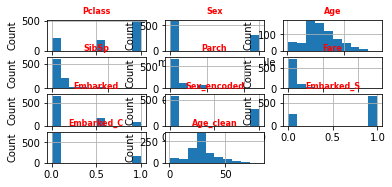

In [46]:
for index, i in enumerate(X):
    plt.subplot(6,3,index+1) 
    df1=df[i].hist()
    df1.plot(kind='bar')
    plt.title(f"{i}", fontsize=8, color= 'red', fontweight='bold')
    plt.ylabel('Count')
plt.Figure(figsize=(16,16))    
plt.show()

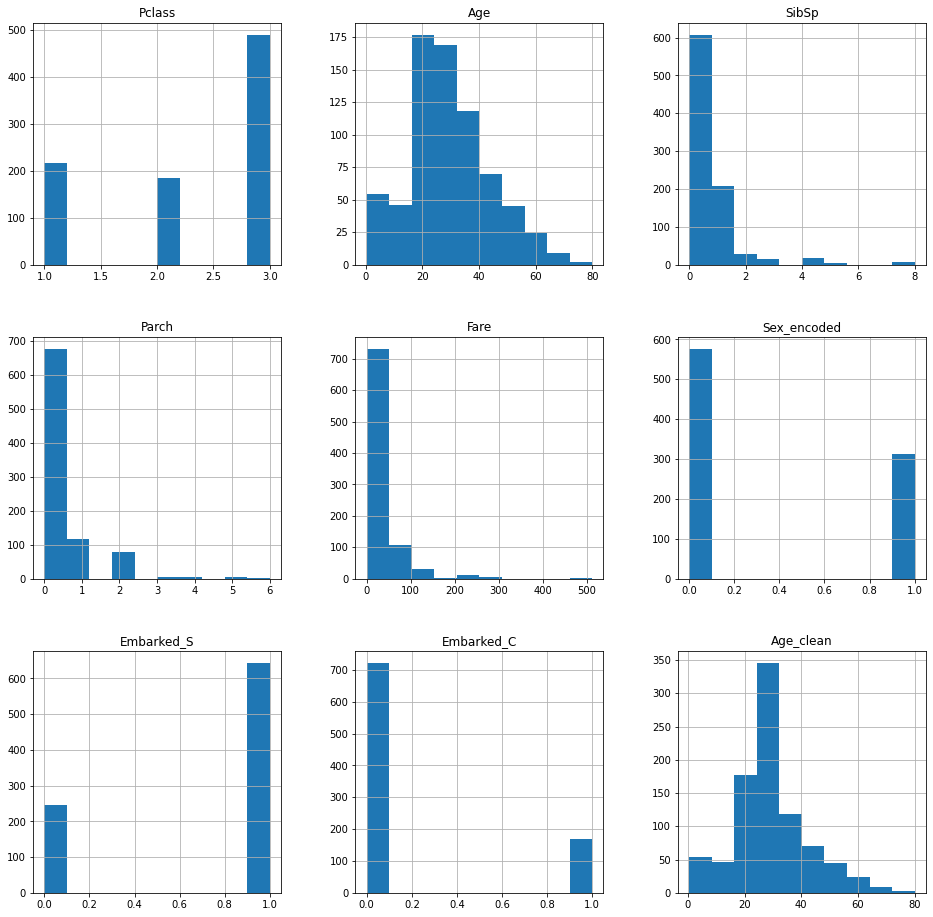

In [47]:
X.hist(figsize=(16,16))
plt.show()

In [48]:
# grafica de boxplot



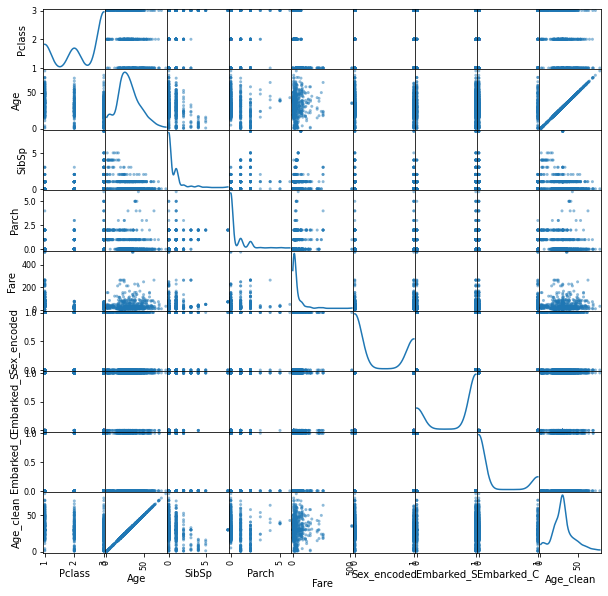

In [49]:
# scatter matrix

pd.plotting.scatter_matrix(X, diagonal='kde',figsize=(10,10))
plt.show()

In [50]:
# hacemos el calculo de la correlacion vemos que hay correlaciones
# En caso que sea mayor que 0.7 me quedo con una de las 2
# aca es -0.54

X.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_S,Embarked_C,Age_clean
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.081720,-0.243292,-0.329727
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,-0.032523,0.036261,1.000000
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.070941,-0.059528,-0.232440
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.063036,-0.011069,-0.180330
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.166603,0.269335,0.090632
Sex_encoded,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-0.125722,0.082853,-0.084660
Embarked_S,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.125722,1.000000,-0.778359,-0.029322
Embarked_C,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.778359,1.000000,0.032330
Age_clean,-0.329727,1.000000,-0.232440,-0.180330,0.090632,-0.084660,-0.029322,0.032330,1.000000


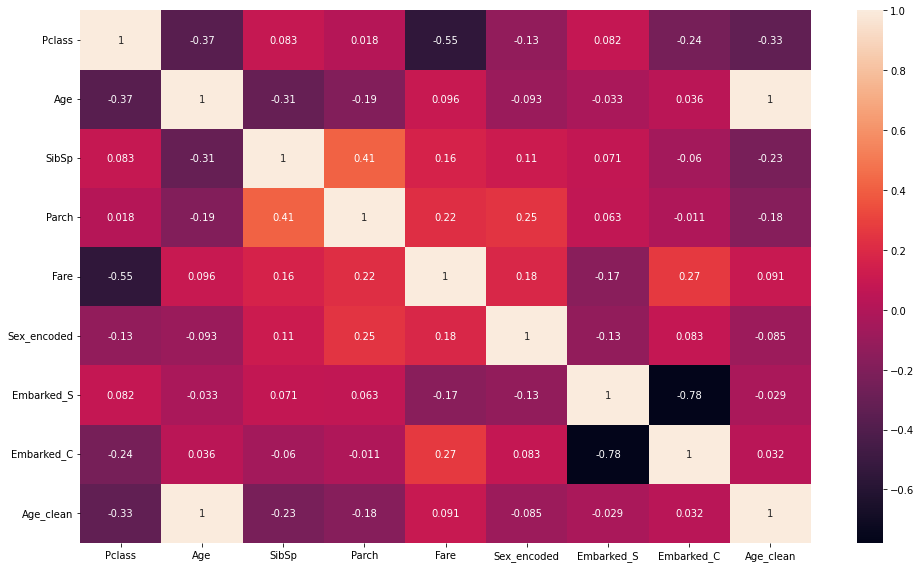

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(), annot=True)
plt.tight_layout()

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [53]:
classifier = RandomForestClassifier(random_state=1107)

In [54]:
# Problemas con las columas Age y AgeCleaned